In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage, misc

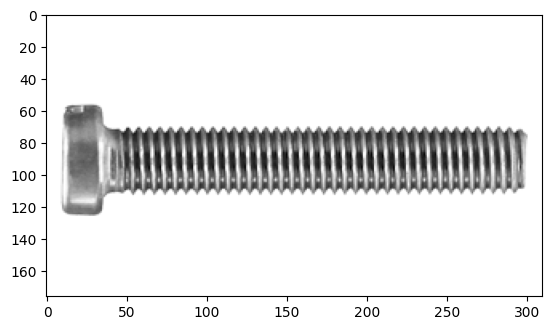

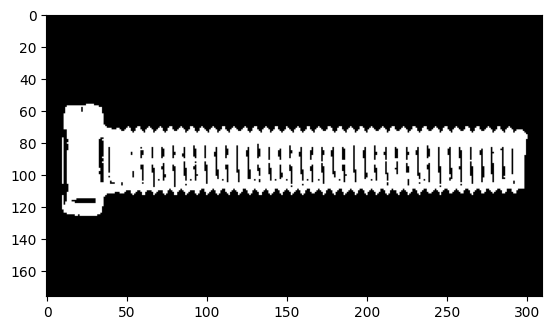

Volume estimado do parafuso: 56.73703003570679 mm³
O scale factor é: 0.07246376811594203


In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carregar a imagem
img = Image.open("parafuso.png")

# Converter para escala de cinza (para trabalhar com um canal)
gray_img = img.convert("L")

# Converter para array numpy
img_array = np.array(gray_img)

# Visualizar a imagem em escala de cinza
plt.imshow(img_array, cmap="gray")
plt.show()

# Encontrar os contornos do parafuso (simplificadamente, por limiarização)
threshold = 220  # Definir um valor de limiar para distinguir o parafuso do fundo
binary_img = img_array < threshold

# Visualizar a imagem binária
plt.imshow(binary_img, cmap="gray")
plt.show()

# Calcular a área da seção transversal (simulação simples por soma dos pixels do parafuso)
section_area = np.sum(binary_img, axis=0)

# Suponha que o diâmetro da cabeça do parafuso é 5 mm, então podemos ajustar a escala
scale_factor = 5 / np.max(section_area)  # Proporcionalidade para o diâmetro da cabeça

# Calcular o volume (integrando a área da seção ao longo do comprimento)
volume = np.sum(section_area) * scale_factor**2  # Considerar a escala em mm^2

print(f"Volume estimado do parafuso: {volume} mm³")
print(f"O scale factor é: {scale_factor}")

O volume total do parafuso é: 2041.05 mm²


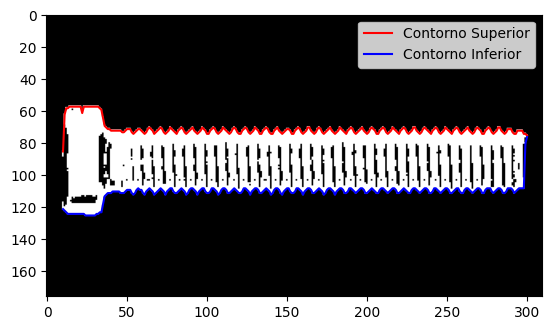

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carregar a imagem
img = Image.open("parafuso.png")

# Converter para escala de cinza
gray_img = img.convert("L")

# Converter para array numpy
img_array = np.array(gray_img)

# Limiarização para binarizar a imagem
threshold = 200  # Escolha um valor de limiar
binary_img = img_array < threshold  # True para pixels do parafuso, False para o fundo

# Inicializar arrays para guardar os contornos superior e inferior
contour_top = []
contour_bottom = []

# Varrer coluna a coluna
for col in range(binary_img.shape[1]):
    # Encontrar a primeira transição do fundo (False) para o parafuso (True) - contorno superior
    for row in range(binary_img.shape[0]):
        if binary_img[row, col]:
            contour_top.append((row, col))
            break  # Parar após encontrar o primeiro ponto

    # Encontrar a última transição do fundo (False) para o parafuso (True) - contorno inferior
    for row in range(binary_img.shape[0] - 1, -1, -1):
        if binary_img[row, col]:
            contour_bottom.append((row, col))
            break  # Parar após encontrar o último ponto

# Converter listas para numpy arrays para fácil manipulação
contour_top = np.array(contour_top)
contour_bottom = np.array(contour_bottom)

# Calcular a altura da seção transversal em cada coluna
heights = (
    contour_bottom[:, 0] - contour_top[:, 0]
)  # Diferença entre contorno inferior e superior

# Escalonar a altura para mm, baseado no diâmetro da cabeça do parafuso (5 mm)
# Supondo que o maior valor de altura corresponde ao diâmetro da cabeça (5 mm)
scale_factor = 5 / np.max(heights)  # Proporção para converter os pixels em mm

# Calcular a área da seção transversal ao longo de todas as colunas
# Aqui consideramos a "altura" em cada coluna como largura * altura, já que as colunas têm largura de 1 pixel
heights_scaled = heights * scale_factor  # Altura em mm para cada coluna

area_per_column = (heights_scaled / 2) ** 2 * np.pi  # Área da seção transversal em mm²

volume = np.sum(area_per_column)  # Volume total em mm³

print(f"O volume total do parafuso é: {volume:.2f} mm²")

# Visualizar a imagem e os contornos
plt.imshow(binary_img, cmap="gray")
plt.plot(contour_top[:, 1], contour_top[:, 0], color="red", label="Contorno Superior")
plt.plot(
    contour_bottom[:, 1], contour_bottom[:, 0], color="blue", label="Contorno Inferior"
)
plt.legend()
plt.show()

np.int64(1)